In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as sci
import scipy.interpolate as interpol
import scipy.optimize as sc
import scipy.stats as stats
import scipy.linalg as la
import scipy.fftpack as fft

In [6]:
m = np.arange(12).reshape((3,4))
row_m = np.mean(m, axis=1)
col_m = np.mean(m, axis=0)

m_m = np.mean(m)

print('row_mean:', row_m)
print('col_mean:', col_m)
print('mean:', m_m)

row_mean: [1.5 5.5 9.5]
col_mean: [4. 5. 6. 7.]
mean: 5.5


In [14]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

out_np = np.outer(u,v)

out_nest = np.array([[i*j for j in v] for i in u])

out_broad = u[:, np.newaxis]*v[np.newaxis,:]

print(out_np, '\n')
print(out_nest, '\n')
print(out_broad)


[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [19]:
np.random.seed(9725)
m_106 = np.random.uniform(size=(10,6))

m_106[np.any((m_106 < 0.1), axis=1)] = 0

m_106

array([[0.55345802, 0.53649947, 0.1082618 , 0.42337965, 0.17803376,
        0.24592949],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.58419769, 0.56774214, 0.67812003, 0.15147537, 0.58361852,
        0.48063742],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.76769359, 0.5389871 , 0.75169598, 0.85910346, 0.15915618,
        0.85138708],
       [0.83103   , 0.99255275, 0.11914013, 0.37219709, 0.67582217,
        0.90309288],
       [0.11227791, 0.34310373, 0.51696127, 0.75632998, 0.30361504,
        0.58021533],
       [0.20669128, 0.90046666, 0.31548336, 0.35343846, 0.91395717,
        0.32415234],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

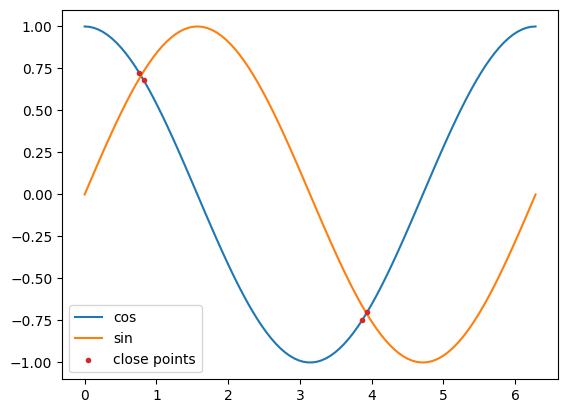

In [26]:
sin_arr = np.linspace(0, 2*np.pi, endpoint=True, num=100)

sin_arr = sin_arr[::-1] 

diff_el = sin_arr[np.abs(np.sin(sin_arr) - np.cos(sin_arr)) < 0.1]

plt.plot(sin_arr, np.cos(sin_arr), label='cos')
plt.plot(sin_arr, np.sin(sin_arr), label='sin')
plt.scatter(diff_el, np.cos(diff_el), label='close points', color='tab:red', zorder=100, marker='.')
plt.legend()
plt.show()

In [29]:
m_1010 = np.array([[i*j for j in range(1,11)] for i in range(1,11)])

anti_diag = np.diag(np.fliplr(m_1010))

k1_diag = np.diag(m_1010, k=1)

k1_diag

array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])

In [3]:

dist_a = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

dist_m = np.array([[np.abs(i-j) for j in dist_a] for i in dist_a])

dist_m_km = dist_m * 1.609

dist_m_km

array([[   0.   ,  318.582,  487.527, 1184.224, 1401.439, 1890.575,
        2373.275, 2484.296, 3078.017, 3938.832],
       [ 318.582,    0.   ,  168.945,  865.642, 1082.857, 1571.993,
        2054.693, 2165.714, 2759.435, 3620.25 ],
       [ 487.527,  168.945,    0.   ,  696.697,  913.912, 1403.048,
        1885.748, 1996.769, 2590.49 , 3451.305],
       [1184.224,  865.642,  696.697,    0.   ,  217.215,  706.351,
        1189.051, 1300.072, 1893.793, 2754.608],
       [1401.439, 1082.857,  913.912,  217.215,    0.   ,  489.136,
         971.836, 1082.857, 1676.578, 2537.393],
       [1890.575, 1571.993, 1403.048,  706.351,  489.136,    0.   ,
         482.7  ,  593.721, 1187.442, 2048.257],
       [2373.275, 2054.693, 1885.748, 1189.051,  971.836,  482.7  ,
           0.   ,  111.021,  704.742, 1565.557],
       [2484.296, 2165.714, 1996.769, 1300.072, 1082.857,  593.721,
         111.021,    0.   ,  593.721, 1454.536],
       [3078.017, 2759.435, 2590.49 , 1893.793, 1676.578, 1187.4

In [10]:
N = 100


def prime_finder(N):
    num_range = np.arange(0, N)
    bool_mask = np.ones(N, dtype=bool)
    bool_mask[0] = bool_mask[1] = False
    
    for i in range(2, N):
        for j in range(i, N):
            if j!=i:
                if j%i == 0:
                    bool_mask[j] = False
    
    return num_range[bool_mask]

prime_n = prime_finder(N)
print(prime_n)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


In [11]:
%%timeit
N=10
prime_n = prime_finder(N)


8.52 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
%%timeit
N=100
prime_n = prime_finder(N)

372 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%%timeit
N=1000
prime_n = prime_finder(N)

39.6 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
def prime_finder_e(N):
    num_range = np.arange(0, N)
    bool_mask = np.ones(N, dtype=bool)
    bool_mask[0] = bool_mask[1] = False
    
    for i in range(2, int(np.sqrt(N))):
        if bool_mask[i]:
            
            for j in range(i**2, N, i):
                bool_mask[j] = False
    
    return num_range[bool_mask]

prime_n = prime_finder_e(100)
prime_n

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

In [17]:
%%timeit
N=10
prime_n = prime_finder_e(N)

6.65 µs ± 176 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
%%timeit
N=100
prime_n = prime_finder_e(N)

15.6 µs ± 54.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [19]:
%%timeit
N=1000
prime_n = prime_finder_e(N)

130 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


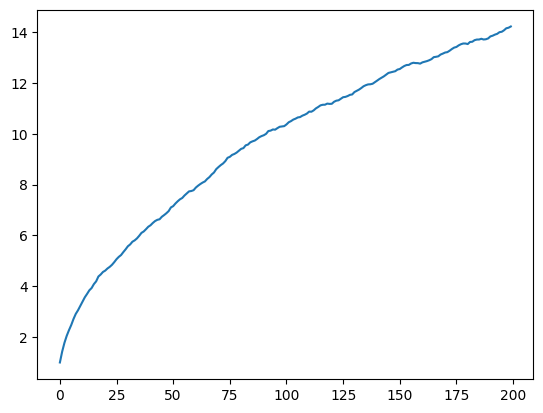

In [29]:
walk = 1000
steps = 200

move = np.random.randint(0, 2, size=(walk, steps))*2-1

dist = np.cumsum(move, axis=1)

dist_sq = dist**2

dist_m = np.mean(dist_sq, axis=0)

plt.plot(np.arange(steps), np.sqrt(dist_m))
plt.show()

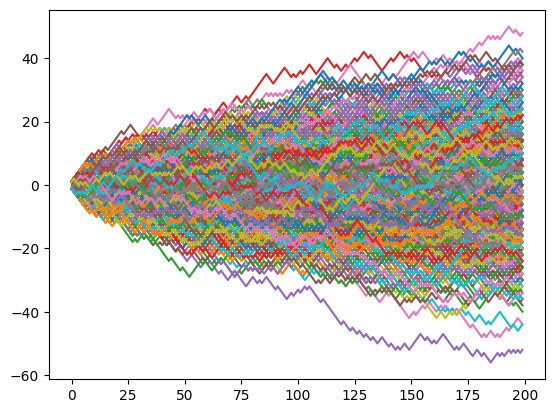

In [31]:
for i in range(walk):
    plt.plot(np.arange(steps), dist[i,:])

In [35]:
with open('./credit_card.dat', 'rb') as f:
    data = f.readlines()
    
for row in data:
    for i in range(int((len(row)-4)/6)):
        print(chr(int(row[i*6:i*6+6], 2)), end='')
    print()

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0026
3026 7380 1241 1084


In [50]:
import json

data = json.load(open('./user_data.json'))

filter_data = filter(lambda credit: credit['CreditCardType'] == 'American Express', data)

with open('./user_data_filtered.csv', 'w') as f:
    f.write('ID,JobTitle,EmailAddress,FirstNameLastName,CreditCard,CreditCardType\n')
    for row in filter_data:
        f.write(row['ID']+','+row['JobTitle']+','+row['EmailAddress']+','+row['FirstNameLastName']+','+
               row['CreditCard']+','+row['CreditCardType']+'\n')

BX in a ORBIT 3564
Data acquisition lasted 9.804 sec


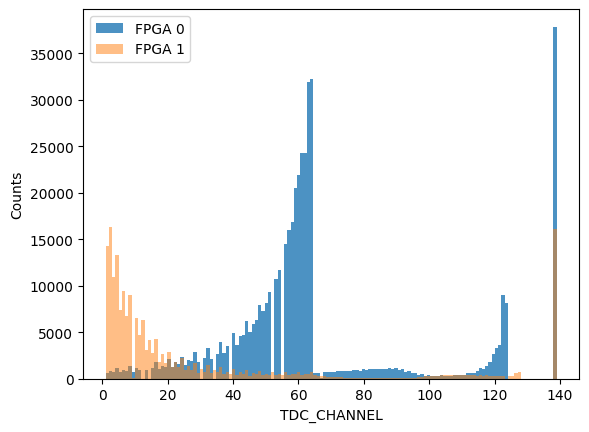

Noisy channel fpga0
 TDC_CHANNEL
139    37850
64     32221
63     31884
dtype: int64

Noisy channel fpga1
 TDC_CHANNEL
2      16344
139    16110
1      14266
dtype: int64

 Unique orbits: 11000

Unique 139 fpga0 10604

Unique 139 fpga1 8409


C:\Users\gabri\AppData\Local\Temp\ipykernel_11832\2481310284.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uniq_orbits_0 = df_1[df_1.FPGA == 0][df_1.TDC_CHANNEL == 139].ORBIT_CNT.nunique()
C:\Users\gabri\AppData\Local\Temp\ipykernel_11832\2481310284.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uniq_orbits_1 = df_1[df_1.FPGA == 1][df_1.TDC_CHANNEL == 139].ORBIT_CNT.nunique()


In [69]:
#1
df = pd.read_csv('./data_000637.txt')

#2
#given the very high n° of records, statistically we can say that the number BX in a Orbit is 
bx_count = df.BX_COUNTER.max()+1 #+1 cause we are counting from 0
print('BX in a ORBIT', bx_count)

#3,4

df['TIME_NS'] = df.TDC_MEAS*25/30 + df.BX_COUNTER*25 + df.ORBIT_CNT*bx_count*25
print('Data acquisition lasted %.3f sec'%((df.TIME_NS.max()-df.TIME_NS.min())*10e-9))

#5,6

df.HEAD = np.random.choice([0,1], size=df.shape[0])

df_1 = df[df.HEAD == 1]

#7
plt.hist(df_1[df_1.FPGA == 0].TDC_CHANNEL, bins=139, alpha=0.8, label='FPGA 0')
plt.hist(df_1[df_1.FPGA == 1].TDC_CHANNEL, bins=139, alpha=0.5, label='FPGA 1')
plt.legend()
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Counts')
plt.show()

#8
noise_0 = df_1[df_1.FPGA == 0].groupby('TDC_CHANNEL').size().sort_values(ascending=False)[:3]
noise_1 = df_1[df_1.FPGA == 1].groupby('TDC_CHANNEL').size().sort_values(ascending=False)[:3]
print('Noisy channel fpga0\n', noise_0)
print('\nNoisy channel fpga1\n', noise_1)

#9
uniq_orbit = df_1.ORBIT_CNT.nunique()
print('\n Unique orbits:', uniq_orbit)

uniq_orbits_0 = df_1[df_1.FPGA == 0][df_1.TDC_CHANNEL == 139].ORBIT_CNT.nunique()
uniq_orbits_1 = df_1[df_1.FPGA == 1][df_1.TDC_CHANNEL == 139].ORBIT_CNT.nunique()
print('\nUnique 139 fpga0', uniq_orbits_0)
print('\nUnique 139 fpga1', uniq_orbits_1)

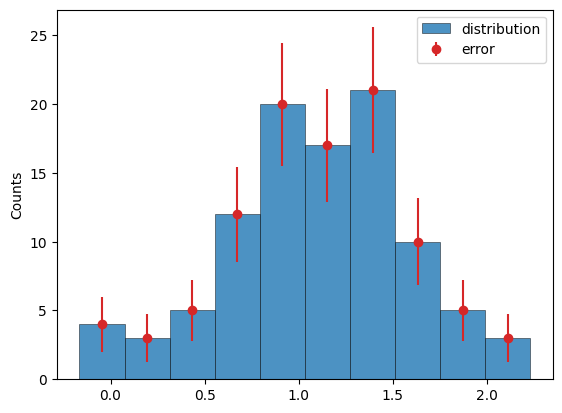

In [78]:
x = np.random.normal(loc=1, scale=0.5, size=100)

counts, bins = np.histogram(x, bins=int(np.sqrt(len(x))))

bin_center = (bins[:-1]+bins[1:])/2

err = np.sqrt(counts)

plt.hist(x, bins=bins, alpha=0.8, edgecolor='black', linewidth=0.4, label='distribution')
plt.errorbar(bin_center, counts, yerr=err, label='error', fmt='o', color='tab:red')
plt.ylabel('Counts')
plt.yticks(np.arange(0, counts.max()+err.max()+2, 5))
plt.legend()
plt.show()

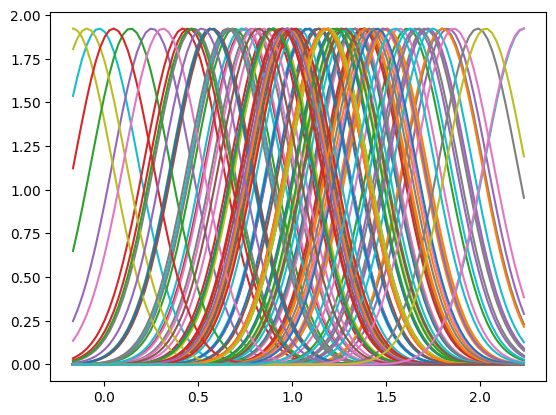

In [91]:
means = x
std = 1.06*x.std()*x.size**(-1/5)
t = np.linspace(x.min(), x.max(), 100)
gaussians = stats.norm.pdf(t[:,None], loc=means, scale=std).T
for gauss in gaussians:
    plt.plot(t, gauss)

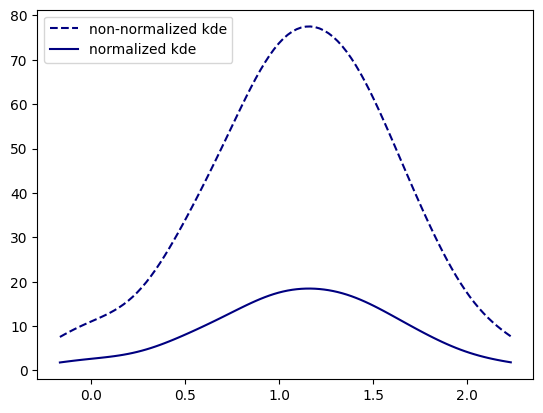

In [106]:
g_sum = np.sum(gaussians, axis=0)
hist_area = sci.trapz(counts, bin_center)
g_area = sci.trapz(g_sum, t)

A = hist_area/g_area

plt.plot(t, g_sum, '--', label='non-normalized kde', color='navy')
plt.plot(t, g_sum*A, label='normalized kde', color='navy')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


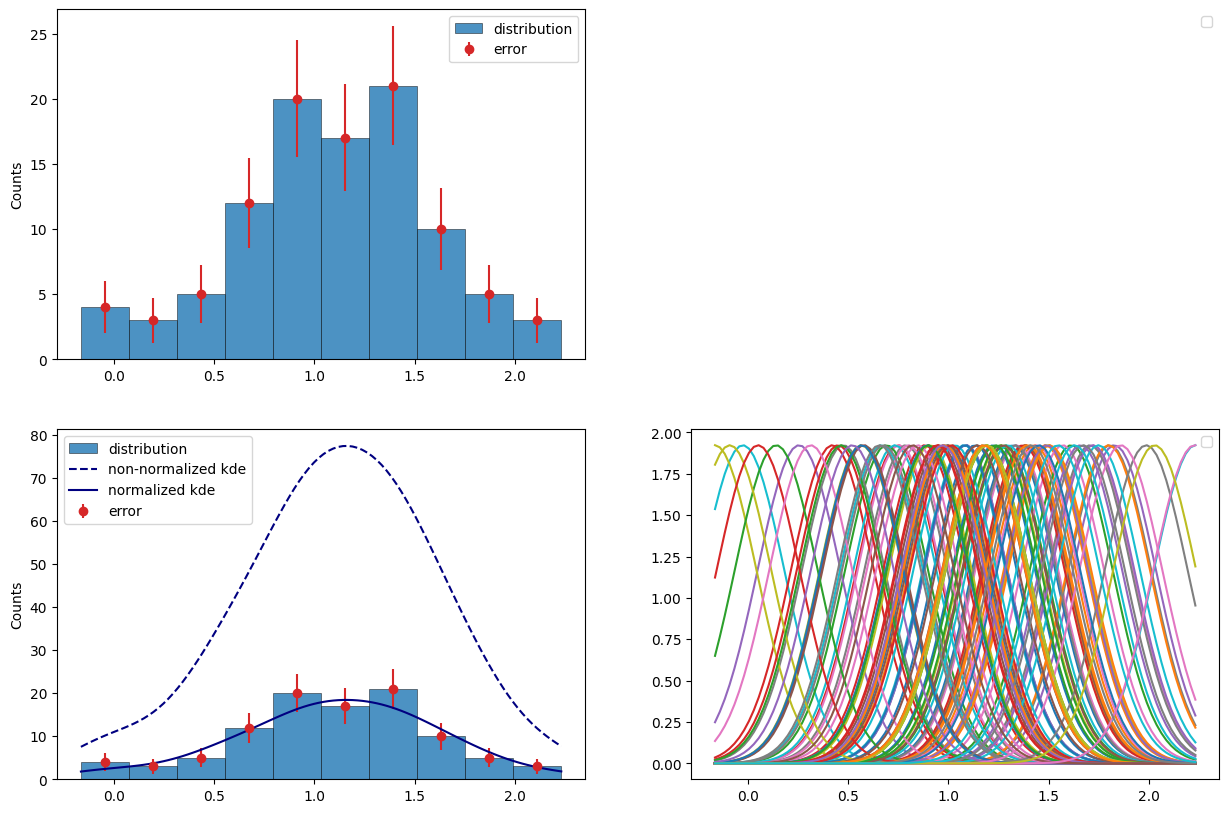

In [107]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0,0].hist(x, bins=bins, alpha=0.8, edgecolor='black', linewidth=0.4, label='distribution')
ax[0,0].errorbar(bin_center, counts, yerr=err, label='error', fmt='o', color='tab:red')
ax[0,0].set_ylabel('Counts')
ax[0,0].set_yticks(np.arange(0, counts.max()+err.max()+2, 5))

for gauss in gaussians:
    ax[1,1].plot(t, gauss)
    
ax[1,0].hist(x, bins=bins, alpha=0.8, edgecolor='black', linewidth=0.4, label='distribution')
ax[1,0].errorbar(bin_center, counts, yerr=err, label='error', fmt='o', color='tab:red')
ax[1,0].set_ylabel('Counts')
ax[1,0].set_yticks(np.arange(0, g_sum.max()+err.max()+2, 10))
ax[1,0].plot(t, g_sum, '--', label='non-normalized kde', color='navy')
ax[1,0].plot(t, g_sum*A, label='normalized kde', color='navy')

for i in range(2):
    for j in range(2):
        ax[i,j].legend()
ax[0,1].set_axis_off()
plt.show()

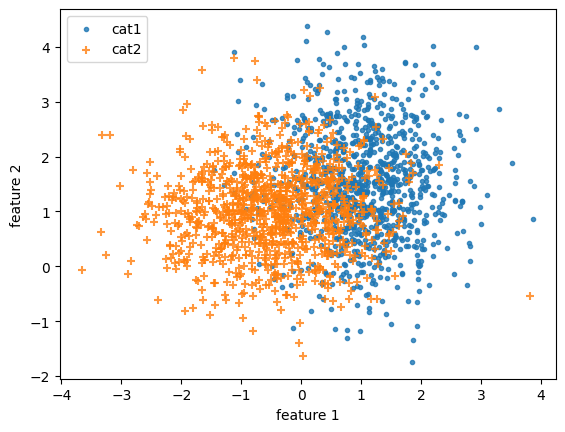

In [111]:
def cat2_dataset(N, mean1, mean2, cov1, cov2):
    cat1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=N)
    cat2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=N)
    
    dataset = np.hstack((cat1, cat2))
    
    return dataset

mean1 = [1, 1.5]
mean2 = [-0.5, 1]
cov1 = np.diag([0.6, 1])
cov2 = np.diag([1, 0.6])

N = 1000

dataset = cat2_dataset(N, mean1, mean2, cov1, cov2)

plt.scatter(dataset[:,0], dataset[:,1], label='cat1', marker='.', alpha=0.8)
plt.scatter(dataset[:,2], dataset[:,3], label='cat2', marker='+', alpha=0.8)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

<Axes: xlabel='residuals', ylabel='distances'>

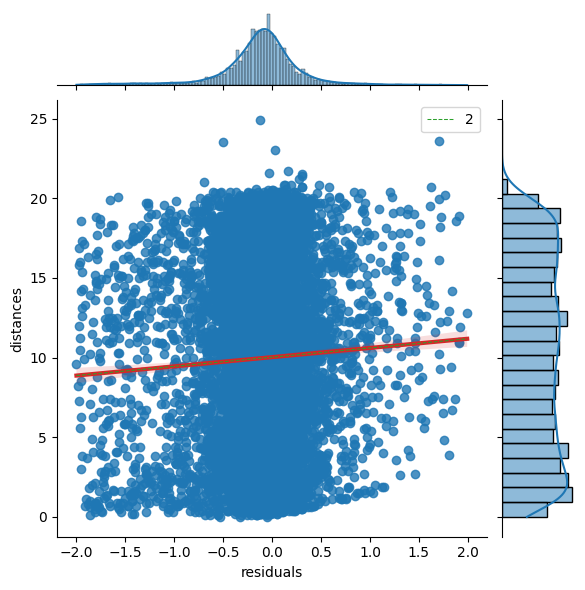

In [125]:
data = np.load('./residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data)

df = df[np.abs(df.residuals) < 2]

results = stats.linregress(df.residuals, df.distances)

df['slope'] = results.slope
df['intercept'] = results.intercept

sns.jointplot(df, x='residuals', y='distances', kind='reg', 
              line_kws={'color': 'tab:red', 'linewidth': 3, 'zorder': 100})
sns.lineplot(df, x='residuals', y=df.intercept+df.slope*df.residuals, size=2, color='tab:green', linestyle='--', zorder=200)

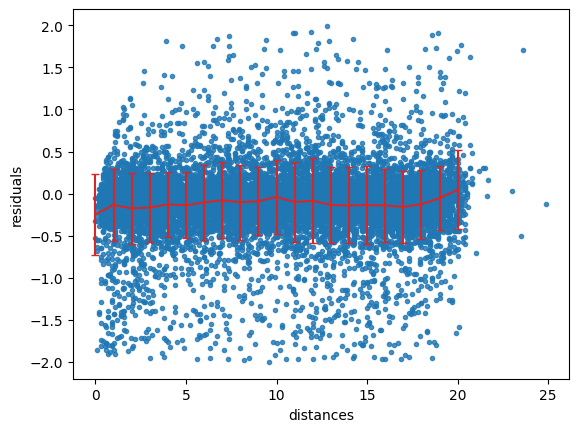

In [133]:
x = np.linspace(0, 20, 21)

y = np.zeros_like(x)
yerr = np.zeros_like(x)

for i in x:
    y[int(i)] = np.mean(df[(df.distances >= i) & (df.distances < i+1)].residuals)
    yerr[int(i)] = np.std(df[(df.distances >= i) & (df.distances < i+1)].residuals)
    
plt.scatter(df.distances, df.residuals, alpha=0.8, marker='.')
plt.errorbar(x, y, yerr=yerr, fmt='-', color='tab:red', capsize=3)
plt.xlabel('distances')
plt.ylabel('residuals')
plt.show()

In [122]:
df.head(3)

residuals  distances     slope  intercept
0   1.100000       16.0  0.577913  10.025258
1  -1.950000        6.3  0.577913  10.025258
8  -0.042857        3.3  0.577913  10.025258

In [154]:
x1 = np.random.normal(loc=0, scale=1, size=1000)
x2 = x1 + np.random.normal(loc=0, scale=3, size=1000)
x3 = 2*x1 + x2

x = np.vstack((x1,x2, x3))

c = np.cov(x)

eigval, eigvect = la.eig(c)

print('eigvalues:\n', eigval)
print('\neigvects:\n', eigvect)

U, s, Vt = np.linalg.svd(c)

evals = s**2/(1000-1)
evects = U

print('\neigvalues:\n', evals)
print('\neigvects:\n', evects)

SVD = np.dot(U, np.dot(np.diag(s), Vt))

LA = np.dot(eigvect, np.dot(np.diag(eigval), eigvect.T))

print('\nIs SVD sim to Cov?', np.allclose(SVD, c))
print('Is LA sim to Cov?', np.allclose(LA, c))
print('Are the 2 methods similar?', np.allclose(SVD, LA))

print()
evals = np.sort(evals)[::-1]
for i in range(len(evals)):
    print('PC %i variability: %.2f'%(i+1, np.real_if_close(evals[i])/np.sum(evals)*100), '%')
    
print()
idx = np.argmax(np.cumsum(evals/np.sum(evals)) >= 0.99) + 1

red_x = np.dot(evects[:, :idx].T, x)

print('original data:\n', x.shape)
print('reduced data:\n', red_x.shape)

eigvalues:
 [2.59968588e+01+0.j 4.03210561e-16+0.j 1.92731316e+00+0.j]

eigvects:
 [[-0.1191846  -0.81649658  0.56491447]
 [-0.5726915  -0.40824829 -0.71088521]
 [-0.81106071  0.40824829  0.41894374]]

eigvalues:
 [6.76513180e-01 3.71825428e-03 1.43053275e-33]

eigvects:
 [[-0.1191846   0.56491447 -0.81649658]
 [-0.5726915  -0.71088521 -0.40824829]
 [-0.81106071  0.41894374  0.40824829]]

Is SVD sim to Cov? True
Is LA sim to Cov? True
Are the 2 methods similar? True

PC 1 variability: 99.45 %
PC 2 variability: 0.55 %
PC 3 variability: 0.00 %

original data:
 (3, 1000)
reduced data:
 (1, 1000)


Text(0.5, 0, 'PC3')

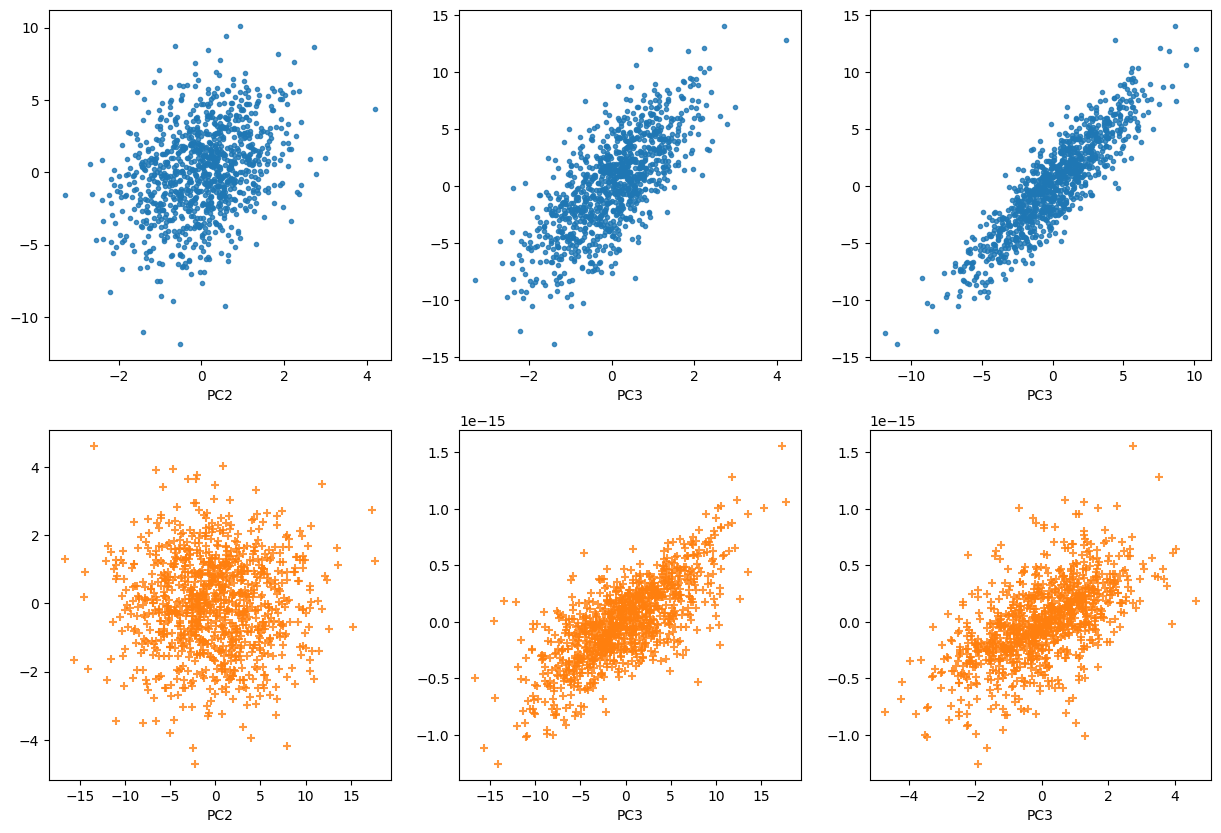

In [160]:
new_x = np.dot(evects.T, x)

fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0,0].scatter(x[0, :], x[1, :], color='tab:blue', marker='.', alpha=0.8)
ax[0,0].set_xlabel('PC1')
ax[0,0].set_xlabel('PC2')

ax[0,1].scatter(x[0, :], x[2, :], color='tab:blue', marker='.', alpha=0.8)
ax[0,1].set_xlabel('PC1')
ax[0,1].set_xlabel('PC3')

ax[0,2].scatter(x[1, :], x[2, :], color='tab:blue', marker='.', alpha=0.8)
ax[0,2].set_xlabel('PC2')
ax[0,2].set_xlabel('PC3')

ax[1,0].scatter(new_x[0, :], new_x[1, :], color='tab:orange', marker='+', alpha=0.8)
ax[1,0].set_xlabel('PC1')
ax[1,0].set_xlabel('PC2')

ax[1,1].scatter(new_x[0, :], new_x[2, :], color='tab:orange', marker='+', alpha=0.8)
ax[1,1].set_xlabel('PC1')
ax[1,1].set_xlabel('PC3')

ax[1,2].scatter(new_x[1, :], new_x[2, :], color='tab:orange', marker='+', alpha=0.8)
ax[1,2].set_xlabel('PC2')
ax[1,2].set_xlabel('PC3')

In [170]:
noise1 = np.random.multivariate_normal(mean=np.zeros(10), cov=1/50*np.diag(np.ones(10)), size=(1000))
noise2 = np.random.multivariate_normal(mean=np.zeros(10), cov=1/50*np.diag(np.ones(10)*3), size=(1000))
noise3 = np.random.multivariate_normal(mean=np.zeros(10), cov=1/50*np.diag(np.ones(10)), size=(1000))

n1 = np.sum(noise1, axis=1)
n2 = np.sum(noise2, axis=1)
n3 = np.sum(noise3, axis=1)

n = np.vstack((n1,n2,n3))

xn = x + n 

cn = np.cov(xn)

eigvaln, eigvectn = la.eig(cn)

print('eigvalues:\n', eigvaln)
print('\neigvects:\n', eigvectn)

Un, sn, Vtn = np.linalg.svd(cn)

evalsn = sn**2/(1000-1)
evectsn = Un

print('\neigvalues:\n', evalsn)
print('\neigvects:\n', evectsn)

SVDn = np.dot(Un, np.dot(np.diag(sn), Vtn))

LAn = np.dot(eigvectn, np.dot(np.diag(eigvaln), eigvectn.T))

print('\nIs SVD sim to Cov?', np.allclose(SVDn, cn))
print('Is LA sim to Cov?', np.allclose(LAn, cn))
print('Are the 2 methods similar?', np.allclose(SVDn, LAn))

print()
evalsn = np.sort(evalsn)[::-1]
for i in range(len(evalsn)):
    print('PC %i variability: %.2f'%(i+1, np.real_if_close(evalsn[i])/np.sum(evalsn)*100), '%')
    
print()
idxn = np.argmax(np.cumsum(evalsn/np.sum(evalsn)) >= 0.99) + 1

red_xn = np.dot(evectsn[:, :idxn].T, xn)

print('original data:\n', xn.shape)
print('reduced data:\n', red_xn.shape)

eigvalues:
 [26.39023869+0.j  0.26100355+0.j  2.35994218+0.j]

eigvects:
 [[-0.11663551 -0.84736336  0.51804584]
 [-0.57871084 -0.36592274 -0.72883078]
 [-0.80714926  0.38480629  0.44769878]]

eigvalues:
 [6.97141840e-01 5.57490202e-03 6.81910463e-05]

eigvects:
 [[-0.11663551  0.51804584 -0.84736336]
 [-0.57871084 -0.72883078 -0.36592274]
 [-0.80714926  0.44769878  0.38480629]]

Is SVD sim to Cov? True
Is LA sim to Cov? True
Are the 2 methods similar? True

PC 1 variability: 99.20 %
PC 2 variability: 0.79 %
PC 3 variability: 0.01 %

original data:
 (3, 1000)
reduced data:
 (1, 1000)


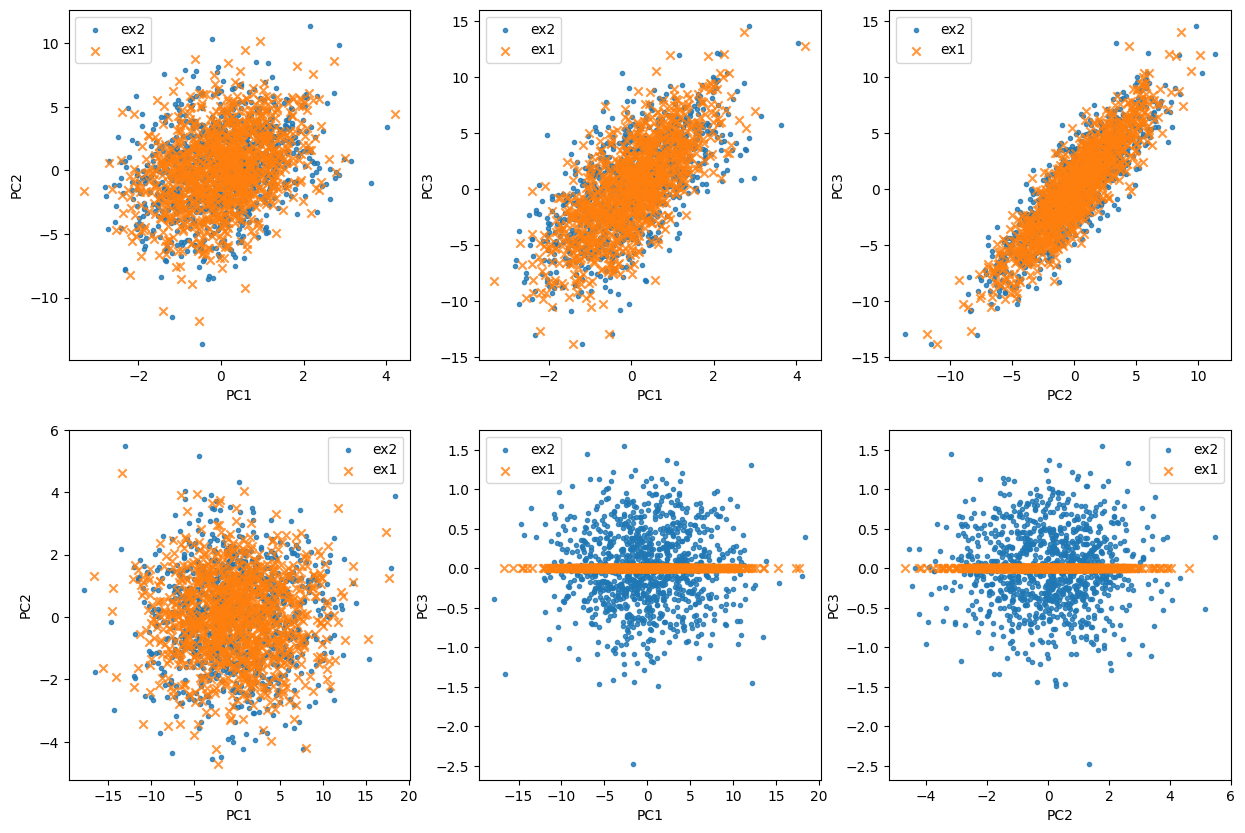

In [173]:
new_xn = np.dot(evectsn.T, xn)

fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0,0].scatter(xn[0, :], xn[1, :], color='tab:blue', marker='.', alpha=0.8, label='ex2')
ax[0,0].scatter(x[0, :], x[1, :], color='tab:orange', marker='x', alpha=0.8, label='ex1')
ax[0,0].set_xlabel('PC1')
ax[0,0].set_ylabel('PC2')

ax[0,1].scatter(xn[0, :], xn[2, :], color='tab:blue', marker='.', alpha=0.8, label='ex2')
ax[0,1].scatter(x[0, :], x[2, :], color='tab:orange', marker='x', alpha=0.8, label='ex1')
ax[0,1].set_xlabel('PC1')
ax[0,1].set_ylabel('PC3')

ax[0,2].scatter(xn[1, :], xn[2, :], color='tab:blue', marker='.', alpha=0.8, label='ex2')
ax[0,2].scatter(x[1, :], x[2, :], color='tab:orange', marker='x', alpha=0.8, label='ex1')
ax[0,2].set_xlabel('PC2')
ax[0,2].set_ylabel('PC3')

ax[1,0].scatter(new_xn[0, :], new_xn[1, :], color='tab:blue', marker='.', alpha=0.8, label='ex2')
ax[1,0].scatter(new_x[0, :], new_x[1, :], color='tab:orange', marker='x', alpha=0.8, label='ex1')
ax[1,0].set_xlabel('PC1')
ax[1,0].set_ylabel('PC2')

ax[1,1].scatter(new_xn[0, :], new_xn[2, :], color='tab:blue', marker='.', alpha=0.8, label='ex2')
ax[1,1].scatter(new_x[0, :], new_x[2, :], color='tab:orange', marker='x', alpha=0.8, label='ex1')
ax[1,1].set_xlabel('PC1')
ax[1,1].set_ylabel('PC3')

ax[1,2].scatter(new_xn[1, :], new_xn[2, :], color='tab:blue', marker='.', alpha=0.8, label='ex2')
ax[1,2].scatter(new_x[1, :], new_x[2, :], color='tab:orange', marker='x', alpha=0.8, label='ex1')
ax[1,2].set_xlabel('PC2')
ax[1,2].set_ylabel('PC3')

for i in range(2):
    for j in range(3):
        ax[i,j].legend()

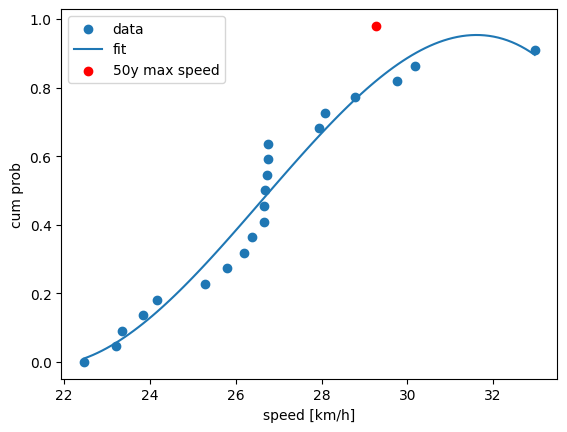

In [189]:
max_speeds = np.load('./max-speeds.npy', allow_pickle=True)
years_nb = max_speeds.shape[0]

max_speeds = np.sort(max_speeds)

cprob = [i/(years_nb+1) for i in range(years_nb)]

quantile = interpol.UnivariateSpline(max_speeds, cprob)

fifty_prob = 1.- 0.02
fifty_wind = quantile(fifty_prob)

t = np.linspace(max_speeds.min(), max_speeds.max(), 100)

plt.scatter(max_speeds, cprob, label='data')
plt.plot(t, quantile(t), label='fit')
plt.scatter(fifty_wind, fifty_prob, color='red', label='50y max speed')
plt.xlabel('speed [km/h]')
plt.ylabel('cum prob')
plt.legend()
plt.show()

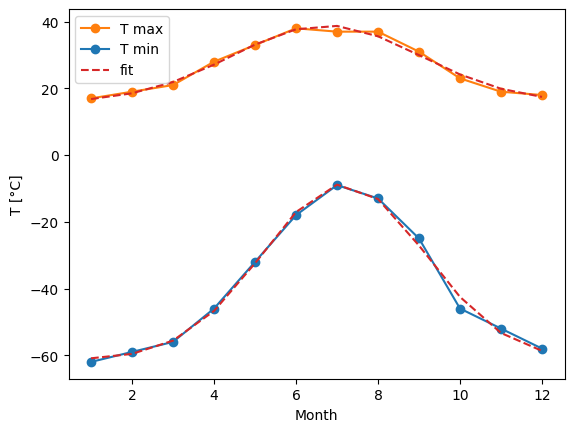

In [213]:
tmax = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
tmin = np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])

month = np.arange(1,13,1)

def t_fit(x, mu, sig, off, scale):
    return scale/np.sqrt(2*np.pi*sig**2) * np.exp((-0.5*(x-mu)**2)/(sig**2)) + off

fit_max, pcov1 = sc.curve_fit(t_fit, month, tmax, p0=(7, 1, 1, 5))
fit_min, pcov2 = sc.curve_fit(t_fit, month, tmin, p0=(7, 1, 1, -45))

plt.plot(month, tmax, 'o-', label='T max', color='tab:orange')
plt.plot(month, tmin, 'o-', label='T min', color='tab:blue')

plt.plot(month, t_fit(month, *fit_max), '--', label='fit', color='tab:red')
plt.plot(month, t_fit(month, *fit_min), '--', color='tab:red')

plt.legend()
plt.xlabel('Month')
plt.ylabel('T [°C]')
plt.show()

In [217]:
np.abs(fit_max-fit_min)[3]/np.sqrt(pcov1+pcov2)[3,3]

C:\Users\gabri\AppData\Local\Temp\ipykernel_11832\4164217995.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.abs(fit_max-fit_min)[3]/np.sqrt(pcov1+pcov2)[3,3]


6.5436654582302225

Init guess: [0, -0.75]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.031628453489874
        x: [ 8.984e-02 -7.127e-01]
      nit: 5
      jac: [ 1.490e-08 -1.937e-07]
 hess_inv: [[ 1.293e-01 -8.130e-03]
            [-8.130e-03  6.241e-02]]
     nfev: 24
     njev: 8 

Init guess: [0, 0.75]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.0316284534898768
        x: [-8.984e-02  7.127e-01]
      nit: 5
      jac: [-2.980e-08  1.788e-07]
 hess_inv: [[ 1.293e-01 -8.130e-03]
            [-8.130e-03  6.241e-02]]
     nfev: 24
     njev: 8 



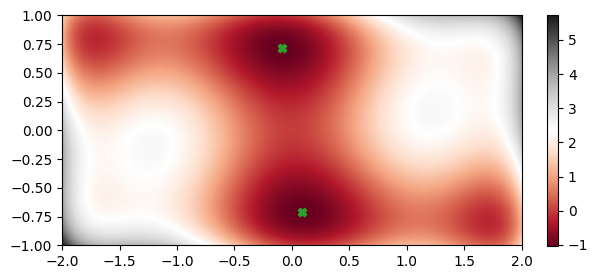

In [240]:
def func(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 1, 1000)

x, y = np.meshgrid(x, y)

z = func([x, y])

guesses = [[0, -0.75], [0, 0.75]]

x_f = []
for guess in guesses:
    res = sc.minimize(func, x0=guess)
    x_f.append(res['x'])
    print('Init guess:', guess)
    print(res, '\n')
    
plt.scatter(x_f[0][0], x_f[0][1], color='tab:green', marker='X')
plt.scatter(x_f[1][0], x_f[1][1], color='tab:green', marker='X')
plt.imshow(z, extent=[-2,2,-1,1], origin='lower', cmap='RdGy')
plt.colorbar(fraction=0.0233)
plt.show()

In [249]:
x0 = [[0,0]]
for guess in x0:
    min_res = sc.minimize(func, x0=guess, method='Powell')
    print(min_res)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1.0316284534898421
       x: [-8.984e-02  7.127e-01]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [-6.211e-04  4.709e-05]]
    nfev: 74


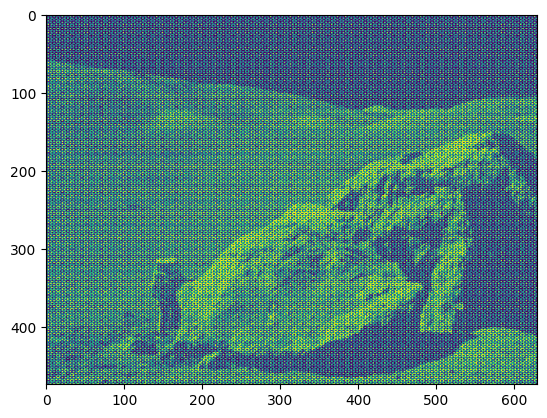

In [262]:
img = plt.imread('moonlanding.png')
spect = fft.fft2(img)

plt.imshow(img)

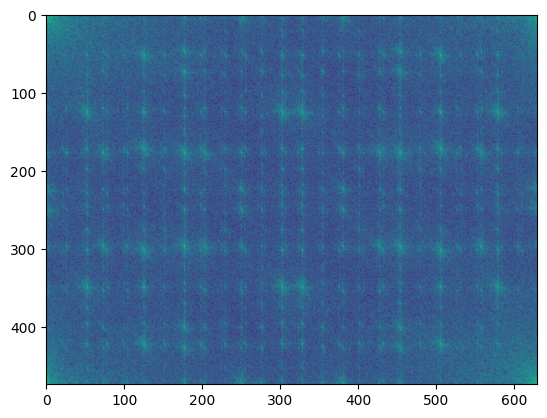

In [266]:
plt.imshow(np.log10(np.abs(spect)+1))

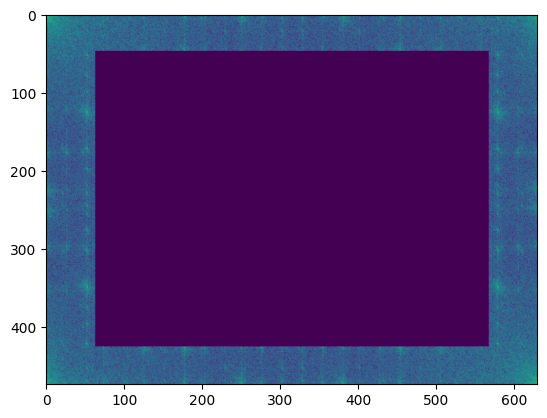

In [268]:
mask = np.ones_like(spect)

r, c = spect.shape

mask[int(r*0.1):int(r*0.9), int(c*0.1):int(c*0.9)] = 0

spect_cp = spect.copy()

spect_cp = spect_cp * mask

plt.imshow(np.log10(np.abs(spect_cp)+1))

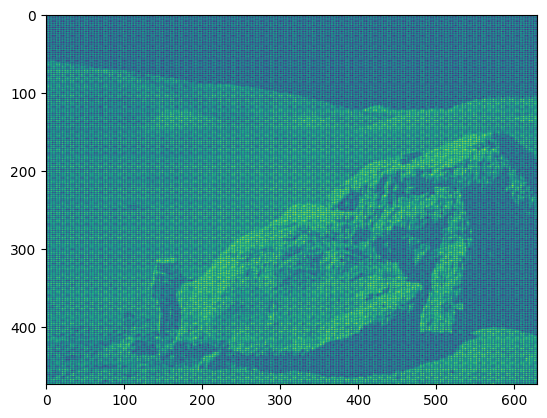

In [277]:
new_img = fft.ifft2(spect_cp).real

plt.imshow(new_img)